In [128]:
def get_score(trees_all):

    fps = {}
    tps = {}         
    for name in trees_all[0].keys():
        fps[name] = []
        tps[name] = []
    
    for trees in trees_all:
    
        ref = Phylo.read(trees['ref'], "newick")        

        for tree in trees.items():
            name = tree[0]
            if name == 'ref':
                continue
            loc = tree[1]
            tree = Phylo.read(loc, "newick")

            root = tree.get_terminals()[0].name
            ref.root_with_outgroup({"name": root})

            fp=[]
            tp=[]

            for i in _bitstrsC(tree).items():
                if i[1] == None:
                    continue
                if i[0] in _bitstrs(ref):
                    tp.append(i[1])
                else:
                    fp.append(i[1])
            fps[name] += fp
            tps[name] += tp
    
    fprs = {}
    tprs = {}      
    
    for name in trees_all[0].keys():
        if name == 'ref':
            continue

        print(name)
        print(len(fps[name]) + len(tps[name]), len(fps[name]), len(tps[name]))
        #'''
        if name == 'aLRT':
            thres = set(tps[name] + fps[name])
            thres = list(thres)
            thres.sort(reverse=False)
            tpr, fpr = [], []
            for i in thres:
                tpr.append(0)
                fpr.append(0)
                for p in tps[name]:
                    if p >= i:
                        tpr[-1] += 1
                for f in fps[name]:
                    if f >= i:
                        fpr[-1] += 1
            fprs[name] = fpr
            tprs[name] = tpr
            continue
        #'''
        tpr = [0]*101
        fpr = [0]*101
        for i in range(101):
            for p in tps[name]:
                if p >= i/100:
                    tpr[i] += 1
            for f in fps[name]:
                if f >= i/100:
                    fpr[i] += 1

        fprs[name] = fpr
        tprs[name] = tpr
    return(fprs,tprs)

In [29]:
def _bitstrsC(tree):
    bitstrs = {}
    term_names = [term.name for term in tree.get_terminals()]
    term_names.sort(reverse = False)
    for clade in tree.get_nonterminals():
        clade_term_names = [term.name for term in clade.get_terminals()]
        boolvals = [name in clade_term_names for name in term_names]
        bitstr = _BitString("".join(map(str, map(int, boolvals))))
        bitstrs[bitstr]=clade.confidence
    return bitstrs

def _bitstrs(tree):
    bitstrs = []
    term_names = [term.name for term in tree.get_terminals()]
    term_names.sort(reverse = False)
    for clade in tree.get_nonterminals():
        clade_term_names = [term.name for term in clade.get_terminals()]
        boolvals = [name in clade_term_names for name in term_names]
        bitstr = _BitString("".join(map(str, map(int, boolvals))))
        bitstrs.append(bitstr)
    return bitstrs

In [30]:
import os
from Bio import Phylo
from Bio.Phylo.Consensus import *
from Bio.Phylo.Consensus import _BitString
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import trapz

# Parsing trees

In [1]:
path = 'real30/'

In [190]:
alrt_name = '.phy_phyml_tree_alrt.txt'
bayes_name = '.phy_phyml_tree_bayes.txt'
sh_name = '.phy_phyml_tree_sh.txt'
chi2_name = '.phy_phyml_tree_chi2.txt'
fbootstrap_name = '.phy_fbs_tree.nwk'
tbe_name = '.phy_tbe_tree.nwk'
perm_name = '.perm_tree.nwk'
perm_tbe_name = '.perm_tbe_tree.nwk'

In [191]:
algn = set()
for i in os.listdir(path):
    algn.add(i.split('.')[0])

In [192]:
trees = []
for i in algn:
    trees.append({
        'aLRT': path + i + alrt_name,
        'aBayes': path + i + bayes_name,
        'SH-aLRT': path + i + sh_name,
        'Chi2-aLRT': path + i + chi2_name,
        'FBS': path + i + fbootstrap_name,
        'TBE': path + i + tbe_name,
        'Permutations': path + i + perm_name,
        'Permut.TBE': path + i + perm_tbe_name,
        'ref': path + i + '.tre'
    })

# Calculate TRPs + FPRs

In [193]:
fprs,tprs = get_score(trees)

aLRT
23388 13043 10345
aBayes
23388 12992 10396
SH-aLRT
23352 13015 10337
Chi2-aLRT
23388 13048 10340
FBS
23388 13043 10345
TBE
23388 13043 10345
Permutations
23388 13043 10345
Permut.TBE
23388 13043 10345


In [173]:
fprs,tprs = get_score(trees)

aLRT
52623 31992 20631
aBayes
52623 32036 20587
SH-aLRT
52542 31973 20569
Chi2-aLRT
52623 31992 20631
FBS
52623 31992 20631
TBE
52623 31992 20631
Permutations
52623 31992 20631
Permut.TBE
52623 31992 20631


In [143]:
fprs,tprs = get_score(trees)

aLRT
81858 51900 29958
aBayes
81858 51951 29907
SH-aLRT
81858 51968 29890
Chi2-aLRT
81858 51954 29904
FBS
81858 51900 29958
TBE
81858 51900 29958
Permutations
81858 51900 29958
Permut.TBE
81858 51900 29958


In [194]:
for name in fprs.keys():
    fprs[name] = [x / max(fprs[name]) for x in fprs[name]][::-1]
    tprs[name] = [x / max(tprs[name]) for x in tprs[name]][::-1]
    
    if fprs[name][0] != 0 or tprs[name][0] != 0:
        fprs[name] = [0] + fprs[name]
        tprs[name] = [0] + tprs[name]

# Plot ROC curve

Text(0.5, 0, 'False Positive Rate')

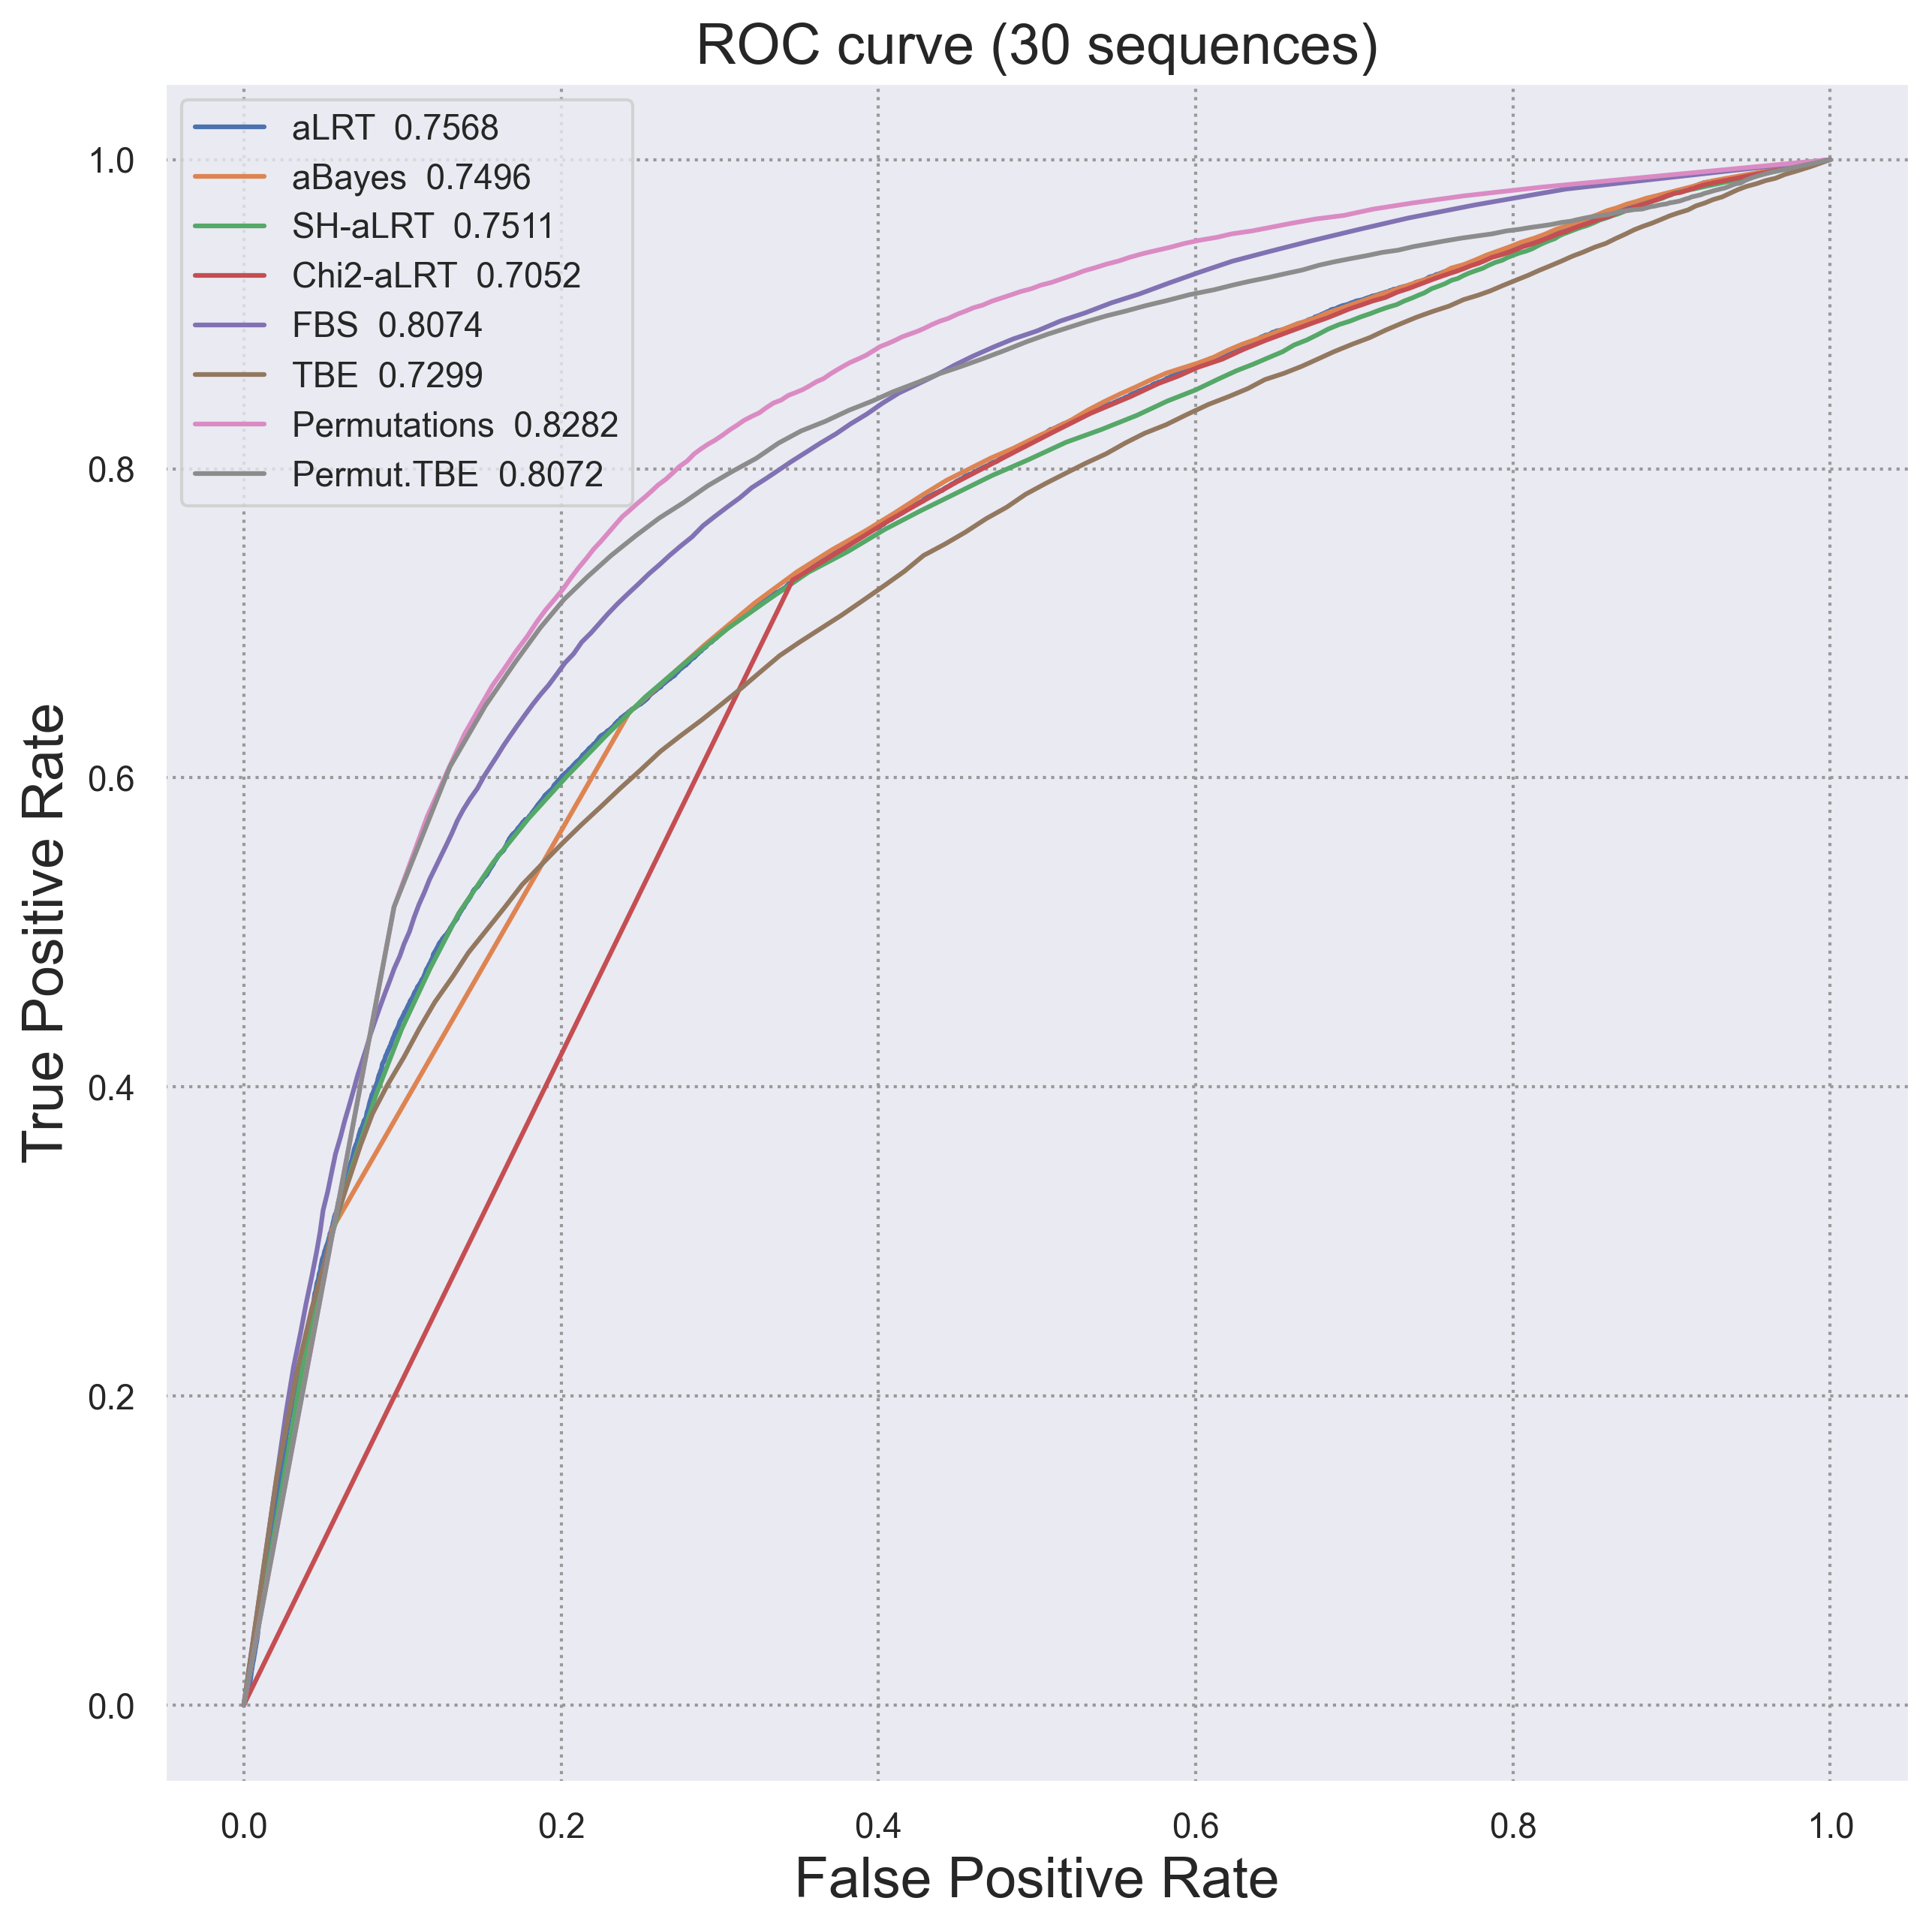

In [175]:
plt.figure(figsize=(10,10), dpi = 300)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
for i in fprs.keys():       
    sns.lineplot(x = fprs[i], y = tprs[i], label=i + '  ' +str(trapz(tprs[i],fprs[i], dx=1))[:6])
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve (' + path[-3: -1] + ' sequences)', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)

# Find best threshold

In [197]:
meas = {}
for name in fprs.keys():
    if name == 'aLRT':
        continue
    meas[name] = {}
    f1 = []
    rec = []
    sp = []
    for i in range(100):
        a = fprs[name][i]
        b = tprs[name][i]
        if a == 0 or a == 1:
            f1.append(0)
        else:
            f_1 = 2 / ((1/(1-a))+(1/b))
            rec.append(b)
            sp.append(1-a)
            f1.append(f_1)
    meas[name]['f1'] = f1.index(max(f1))
    meas[name]['recall'] = rec[meas[name]['f1'] - 1]
    meas[name]['spec'] = sp[meas[name]['f1'] - 1]
    meas[name]['f1'] = 100 - f1.index(max(f1))

In [196]:
meas#15

{'aBayes': {'f1': 97,
  'recall': 0.6565025009619084,
  'spec': 0.7378386699507389},
 'SH-aLRT': {'f1': 88,
  'recall': 0.6621843861855471,
  'spec': 0.736534767575874},
 'Chi2-aLRT': {'f1': 99,
  'recall': 0.6960348162475822,
  'spec': 0.6868485591661557},
 'FBS': {'f1': 48, 'recall': 0.726824552924118, 'spec': 0.7313501495054819},
 'TBE': {'f1': 75, 'recall': 0.6544224262928952, 'spec': 0.7221498121597791},
 'Permutations': {'f1': 89,
  'recall': 0.7314644755920735,
  'spec': 0.7602545426665644},
 'Permut.TBE': {'f1': 95,
  'recall': 0.7103914934751088,
  'spec': 0.7740550486851184}}

In [177]:
meas#30

{'aBayes': {'f1': 97,
  'recall': 0.6862583183562442,
  'spec': 0.7091709327007116},
 'SH-aLRT': {'f1': 86,
  'recall': 0.6744129515289999,
  'spec': 0.7217339630313077},
 'Chi2-aLRT': {'f1': 99,
  'recall': 0.7278852212689642,
  'spec': 0.6541010252563141},
 'FBS': {'f1': 39, 'recall': 0.7321506470844845, 'spec': 0.7444361090272569},
 'TBE': {'f1': 75, 'recall': 0.627017594881489, 'spec': 0.7248999749937484},
 'Permutations': {'f1': 79,
  'recall': 0.7690853569870583,
  'spec': 0.7612528132033008},
 'Permut.TBE': {'f1': 92,
  'recall': 0.7437836265813581,
  'spec': 0.7685046261565391}}

In [165]:
meas#45

{'aBayes': {'f1': 98,
  'recall': 0.6451666833851607,
  'spec': 0.7455294412042117},
 'SH-aLRT': {'f1': 85,
  'recall': 0.6644697223151556,
  'spec': 0.7242533866995073},
 'Chi2-aLRT': {'f1': 99,
  'recall': 0.7265583199571963,
  'spec': 0.639392539554221},
 'FBS': {'f1': 33, 'recall': 0.7400360504706589, 'spec': 0.736917148362235},
 'TBE': {'f1': 71, 'recall': 0.6461713064957607, 'spec': 0.6876300578034682},
 'Permutations': {'f1': 78,
  'recall': 0.7602643701181654,
  'spec': 0.7730057803468208},
 'Permut.TBE': {'f1': 92,
  'recall': 0.7364977635356166,
  'spec': 0.7791136801541426}}

# Restore FPRs/TPRs

In [136]:
save15 = (tprs,fprs)
print(save15)

({'aLRT': [0, 9.666505558240696e-05, 9.666505558240696e-05, 0.00019333011116481392, 0.0002899951667472209, 0.00038666022232962784, 0.0004833252779120348, 0.0004833252779120348, 0.0005799903334944418, 0.0006766553890768487, 0.0007733204446592557, 0.0007733204446592557, 0.0008699855002416626, 0.0009666505558240696, 0.0009666505558240696, 0.0010633156114064765, 0.0011599806669888835, 0.0011599806669888835, 0.0011599806669888835, 0.0011599806669888835, 0.0012566457225712904, 0.0013533107781536974, 0.0013533107781536974, 0.0014499758337361043, 0.0015466408893185114, 0.0016433059449009182, 0.0017399710004833253, 0.0018366360560657321, 0.0018366360560657321, 0.0019333011116481392, 0.002029966167230546, 0.002126631222812953, 0.002126631222812953, 0.00222329627839536, 0.002319961333977767, 0.002416626389560174, 0.0025132914451425807, 0.0025132914451425807, 0.0025132914451425807, 0.0025132914451425807, 0.002609956500724988, 0.002609956500724988, 0.002609956500724988, 0.002706621556307395, 0.0028

In [178]:
save30 = (tprs,fprs)
print(save30)

({'aLRT': [0, 0.0, 0.0, 4.847074790364015e-05, 4.847074790364015e-05, 9.69414958072803e-05, 9.69414958072803e-05, 9.69414958072803e-05, 0.00014541224371092046, 0.0001938829916145606, 0.00024235373951820077, 0.00024235373951820077, 0.0002908244874218409, 0.0003392952353254811, 0.0003392952353254811, 0.0003877659832291212, 0.0003877659832291212, 0.0004362367311327614, 0.00048470747903640155, 0.00048470747903640155, 0.0005331782269400417, 0.0005816489748436818, 0.0005816489748436818, 0.000630119722747322, 0.0006785904706509622, 0.0006785904706509622, 0.0007270612185546024, 0.0007755319664582424, 0.0007755319664582424, 0.0008240027143618826, 0.0008724734622655228, 0.0008724734622655228, 0.0008724734622655228, 0.0008724734622655228, 0.0008724734622655228, 0.0009209442101691629, 0.0009694149580728031, 0.0009694149580728031, 0.0009694149580728031, 0.0010178857059764432, 0.0010663564538800833, 0.0011148272017837235, 0.0011632979496873637, 0.0012117686975910038, 0.001260239445494644, 0.00130871

In [168]:
save45 = (tprs,fprs)
print(save45)

({'aBayes': [0, 0.3071856087203665, 0.6451666833851607, 0.6870966663322968, 0.712508777209349, 0.731534423379142, 0.7473501187013074, 0.7602233590798141, 0.7705219513826195, 0.7810211656134015, 0.789413849600428, 0.7967699869595747, 0.8049954860066205, 0.812284749389775, 0.818370281205069, 0.8237536362724446, 0.8298726050757348, 0.8345872203831879, 0.840137760390544, 0.8450864346139699, 0.8501019828133882, 0.85448222824088, 0.8583274818604341, 0.8628080382519143, 0.8667536028354565, 0.871000100310964, 0.874042866218611, 0.8784231116461029, 0.8819005583976995, 0.8851105092453272, 0.8884876450329354, 0.8919650917845321, 0.895542849500117, 0.8984184304677835, 0.9019961881833685, 0.9053398869829806, 0.9082823419266393, 0.9114588557862707, 0.914267562777945, 0.9172768916975959, 0.9205871535092119, 0.9239642892968202, 0.926940181228475, 0.9295148293041763, 0.9327916541277962, 0.9353663022034975, 0.9384759420871368, 0.9409502791988498, 0.9436252382385395, 0.9467014411341826, 0.949476711137860

In [187]:
tprs,fprs = save15